<a href="https://colab.research.google.com/github/cap497/UFMG/blob/main/Teoria_dos_Jogos_Evolutivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

In [2]:
def density(mat):
  sum = 0
  for x in range(L):
    for y in range(L):
      sum += mat[x][y]
  return sum / L**2

In [3]:
def expand(mat):
  mat = np.vstack((mat[9],mat,mat[0]))
  mat = np.hstack((mat[:,[9]],mat,mat[:,[0]]))
  return mat

In [4]:
def contract(mat):
  mat = np.delete(mat,0,1)
  mat = np.delete(mat,mat.shape[1]-1,1)
  mat = np.delete(mat,0,0)
  mat = np.delete(mat,len(mat)-1,0)
  return mat

In [5]:
def Ex(mat, b):
  mat = expand(mat)
  mEx = np.zeros((L+2)**2).reshape((L+2,L+2))
  for x in range(1,L+1):
    for y in range(1,L+1):
      mEx[x][y] = mat[x][y] + mat[x][y+1] + mat[x][y-1] + mat[x-1][y] + mat[x+1][y]
  mEx = b * contract(mEx)
  return mEx

In [6]:
def Ey(mEx):
  mEx = expand(mEx)
  mEy = np.zeros((L+2)**2).reshape((L+2,L+2))
  rand = np.random.randint(1,5, size=(L+2,L+2))
  for x in range(1,L+1):
    for y in range(1,L+1):
      if rand[x][y] == 1:
        mEy[x][y] = mEx[x][y+1]
      elif rand[x][y] == 2:
        mEy[x][y] = mEx[x+1][y]
      elif rand[x][y] == 3:
        mEy[x][y] = mEx[x][y-1]
      elif rand[x][y] == 4:
        mEy[x][y] = mEx[x-1][y]
  mEy = contract(mEy)
  return mEy, rand

In [7]:
def W(mat, K, b):
  mEx = Ex(mat, b)
  mEy, mRand = Ey(mEx)
  mEy = expand(mEy)
  mat = expand(mat)
  for x in range(1,L):
    for y in range(1,L):
      e = (mEy[x][y] - mEx[x][y]) / K
      prob = 1 / (1 + np.exp(-e))
      rand = np.random.random(1)[0]
      if prob < rand:
        if mRand[x][y] == 1:
          mat[x][y] = mat[x][y+1]
        elif mRand[x][y] == 2:
          mat[x][y] = mat[x+1][y]
        elif mRand[x][y] == 3:
          mat[x][y] = mat[x][y-1]
        elif mRand[x][y] == 4:
          mat[x][y] = mat[x-1][y]
  mat = contract(mat)
  return mat

In [8]:
def gen_matrix(L):
  arr = np.random.random(L**2)
  mat = np.reshape(arr, ((L,L)))
  rand = np.random.random(1)[0]
  print(rand)
  for x in range(L):
    for y in range(L):
      if mat[x][y] < rand:
        mat[x][y] = 0
      else:
        mat[x][y] = 1
  return mat

In [39]:
def evolution(L, K, b, final):
  mat = gen_matrix(L)
  c = density(mat)
  C = np.array(c)
  c_prev = c
  #print(0, c, c)

  n_cols = 5
  n_rows = ceil(final / n_cols)
  plt.figure(figsize=(n_cols * 4, n_rows * 3))

  #sns.set(rc = {'figure.figsize':(4,3)})
  #sns.heatmap(mat);
  #plt.show()

  plot_count = 1
  for i in range(1,final+1):
    mat = W(mat, K, b)
    c = density(mat)
    C = np.append(C, c)

    if i % 5 == 0 or i == final:
      ax = plt.subplot(n_rows, n_cols, plot_count)
      sns.heatmap(mat, cbar=False)
      plt.title(f'Iteration {i}')
      plot_count += 1
      ax.set_xticks([])
      ax.set_yticks([])

  plt.show()

  print("Densidade")
  plt.figure(figsize=(8,4))
  plt.ylim([0,1])
  plt.plot(C);
  plt.show()

In [40]:
# desertor = 0 / cooperador = 1
L = 200

0.836461714584341


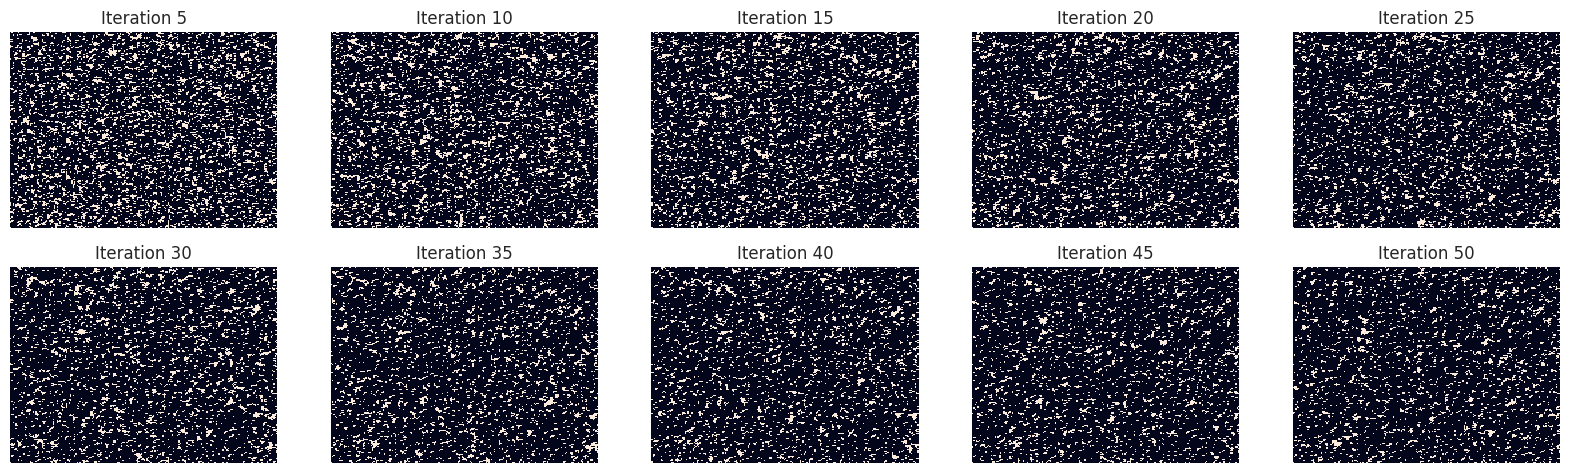

Densidade


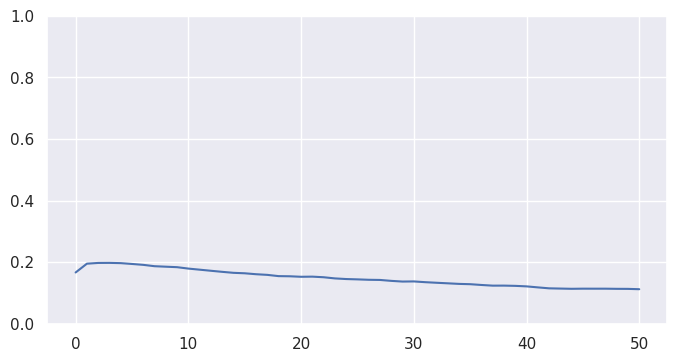




0.7656751720623843


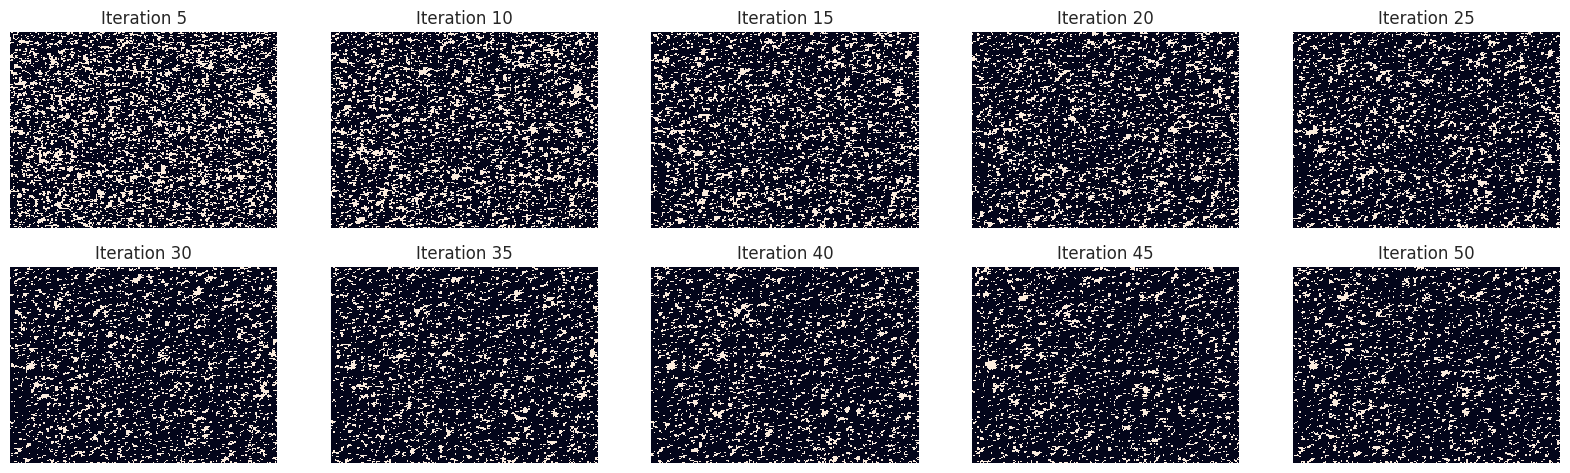

Densidade


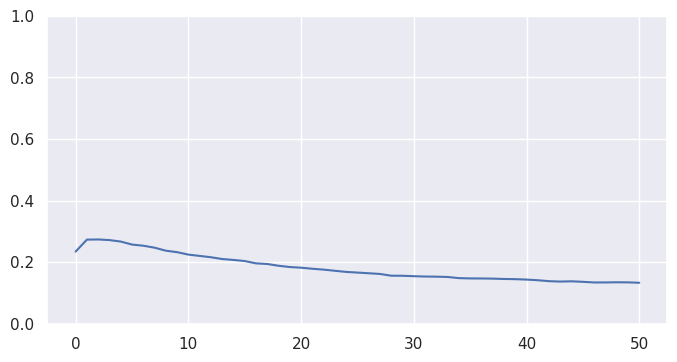




0.8095864649090556


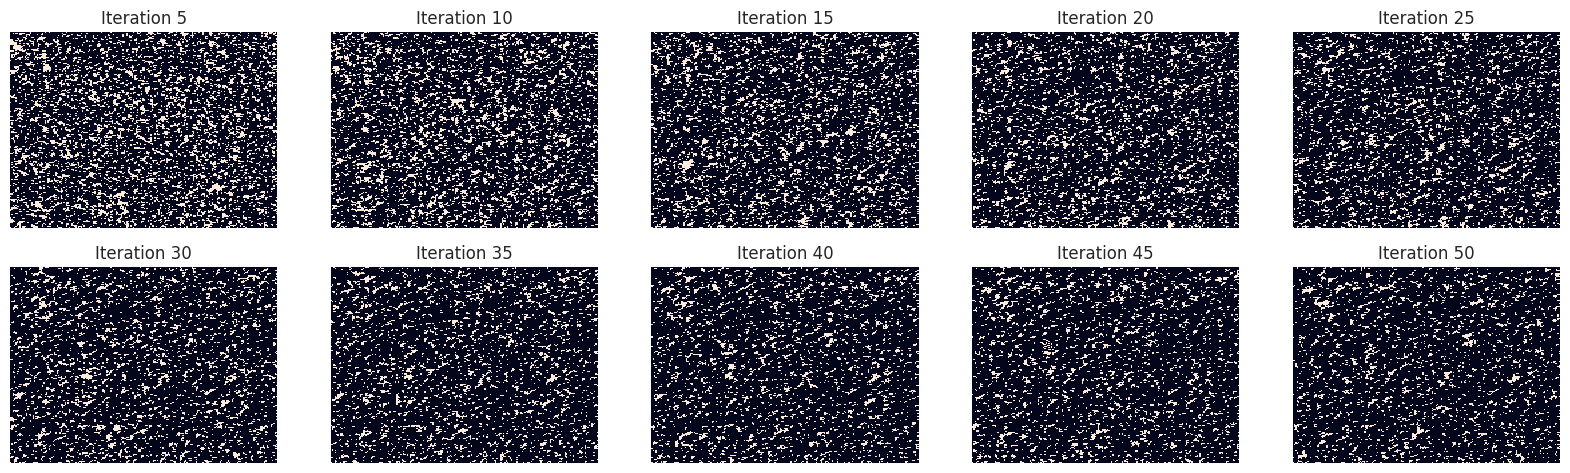

Densidade


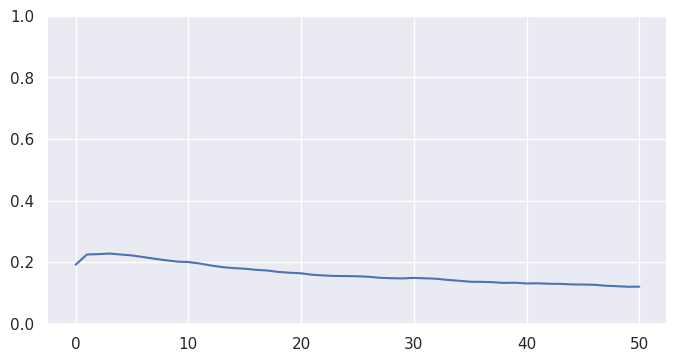

In [42]:
K = 0.02
b = 1
final = 50
for i in range(3):
  evolution(L, K, b, final)
  print("\n\n")

0.5287169258595517


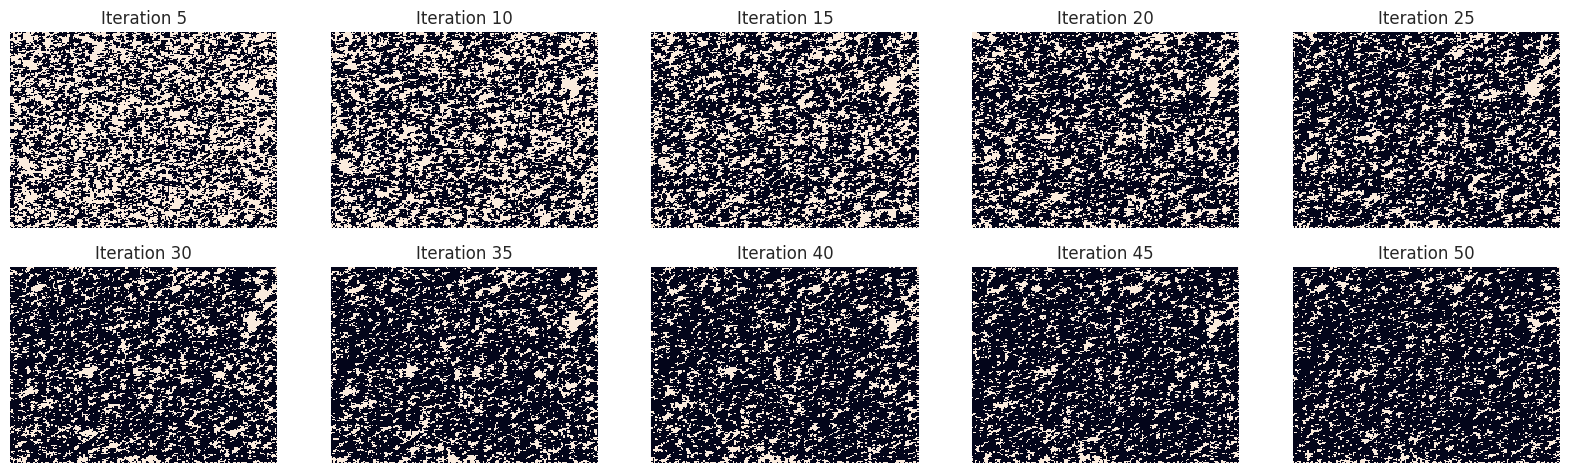

Densidade


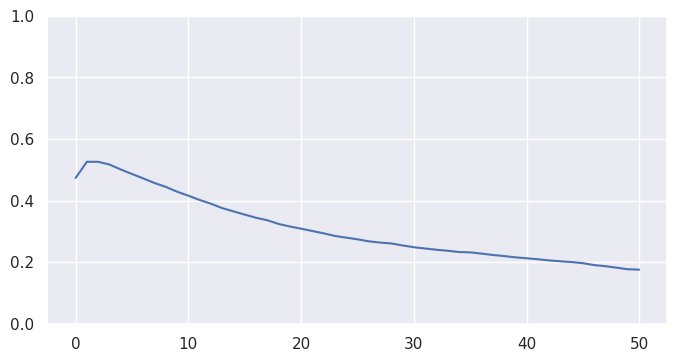




0.019553983561439114


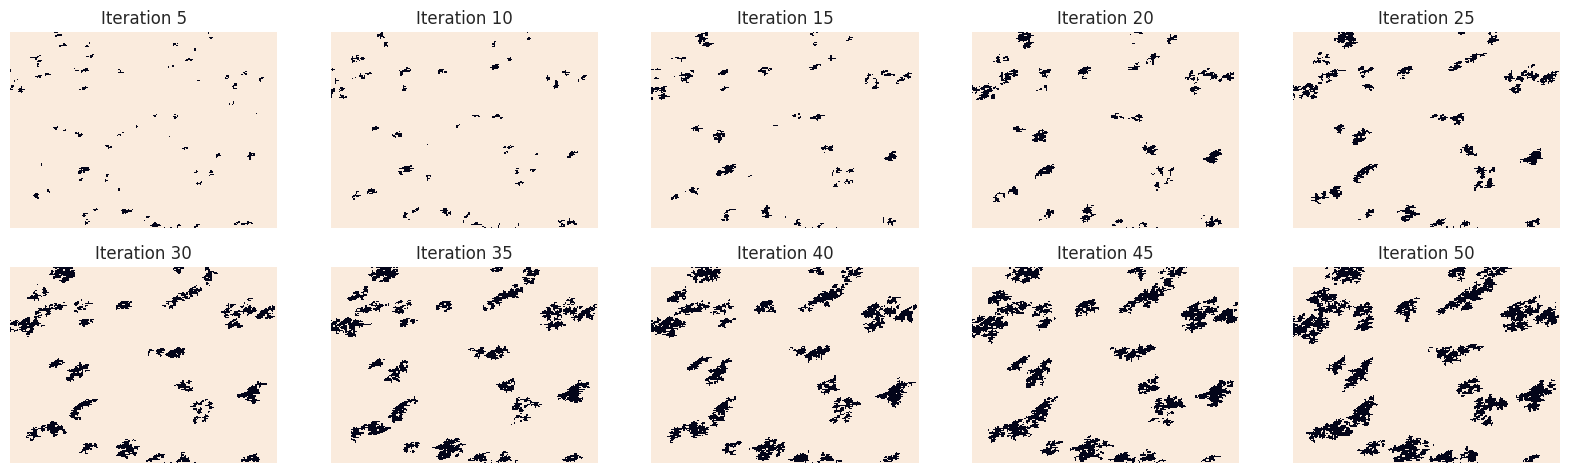

Densidade


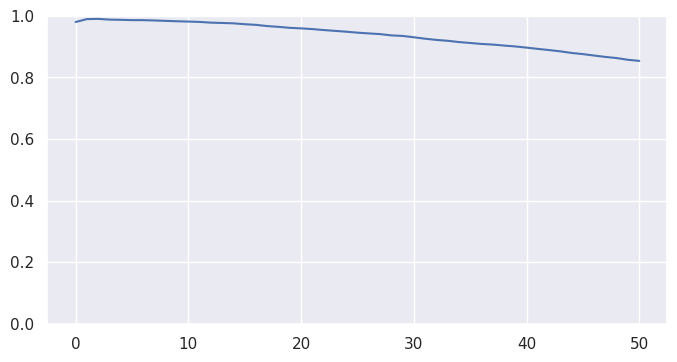




0.5059546480022646


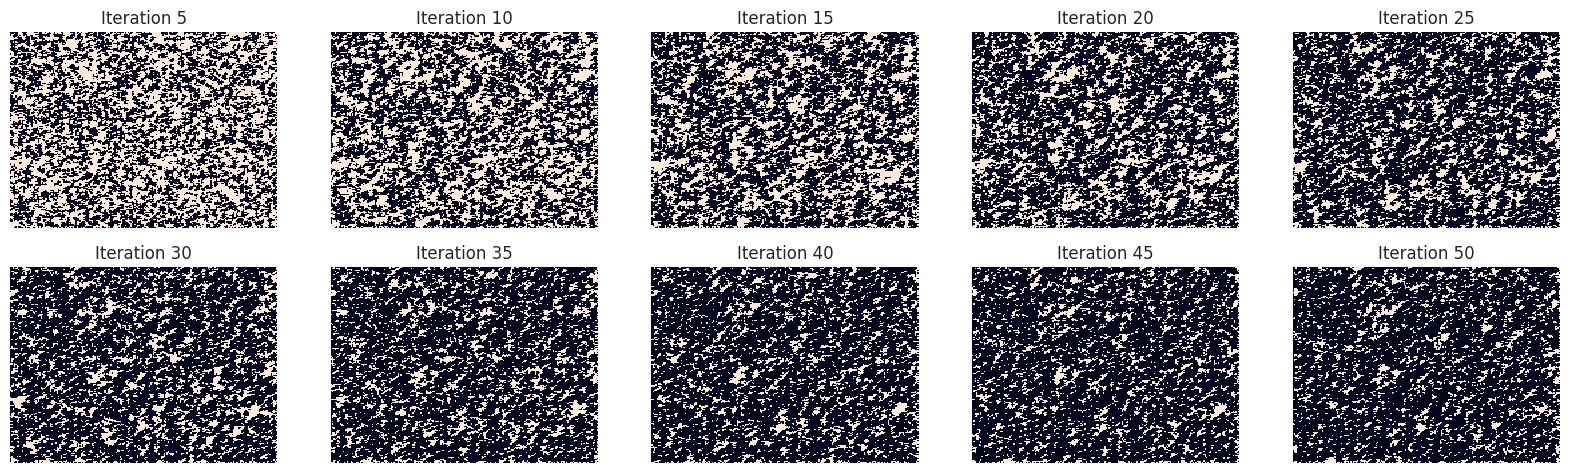

Densidade


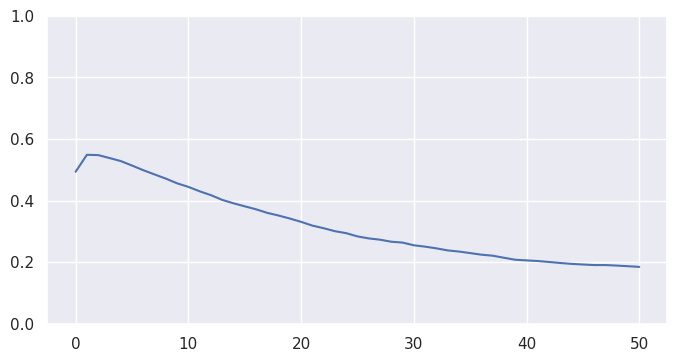

In [43]:
K = 0.02
b = 2
final = 50
for i in range(3):
  evolution(L, K, b, final)
  print("\n\n")

0.9797895765932633


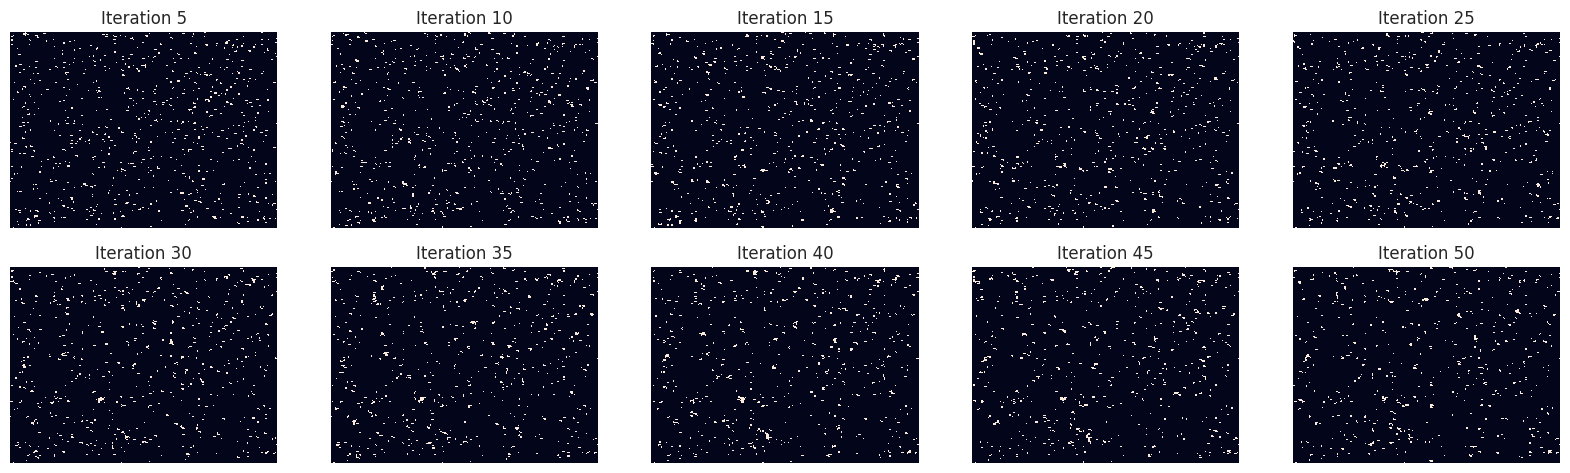

Densidade


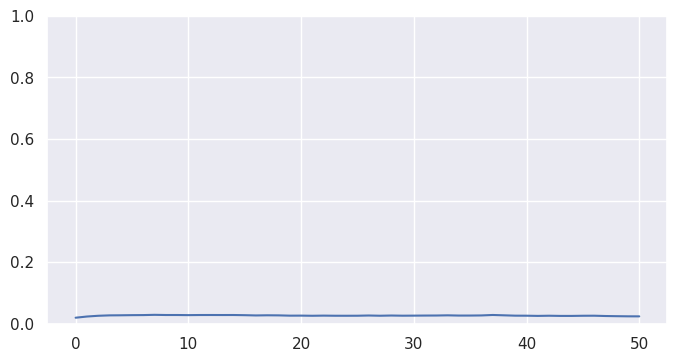




0.9351859730100975


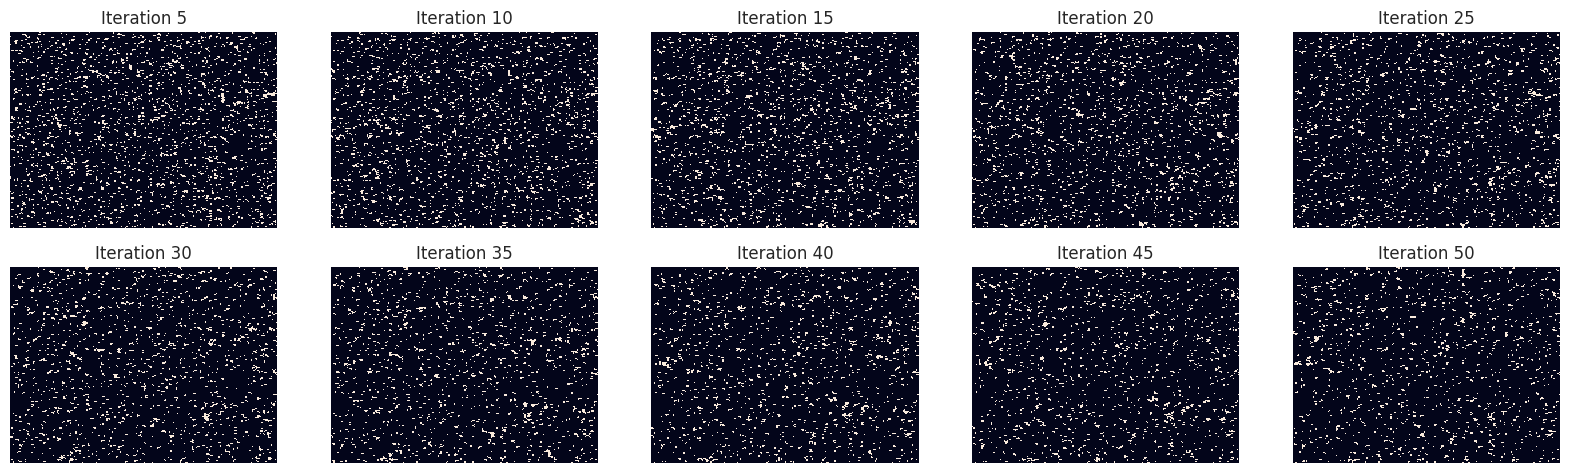

Densidade


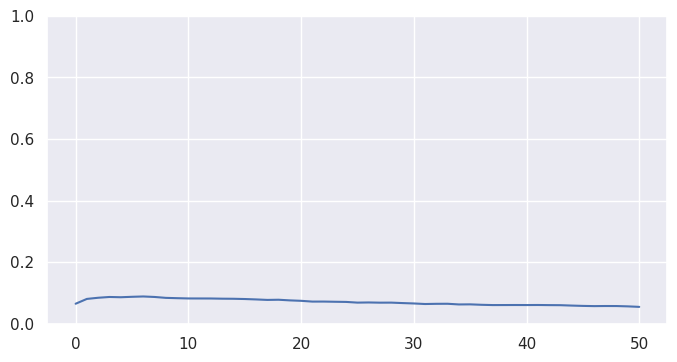




0.5342119106508681


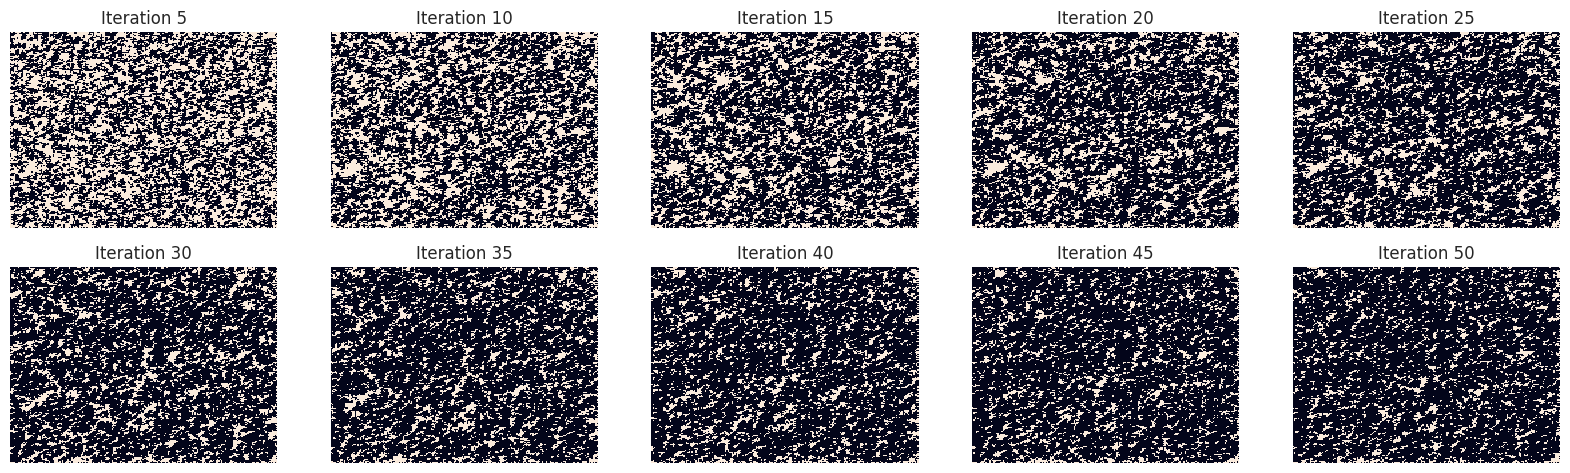

Densidade


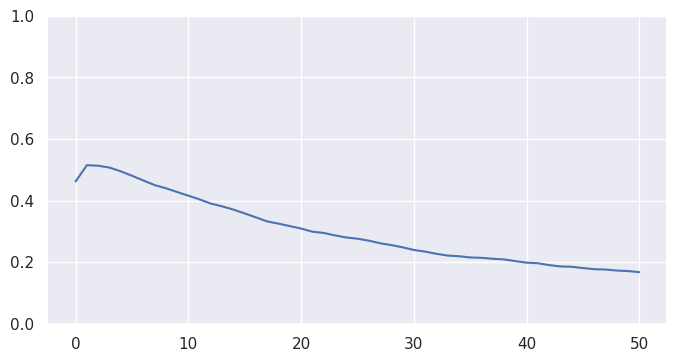

In [44]:
K = 0.25
b = 1
final = 50
for i in range(3):
  evolution(L, K, b, final)
  print("\n\n")

0.012317981085974372


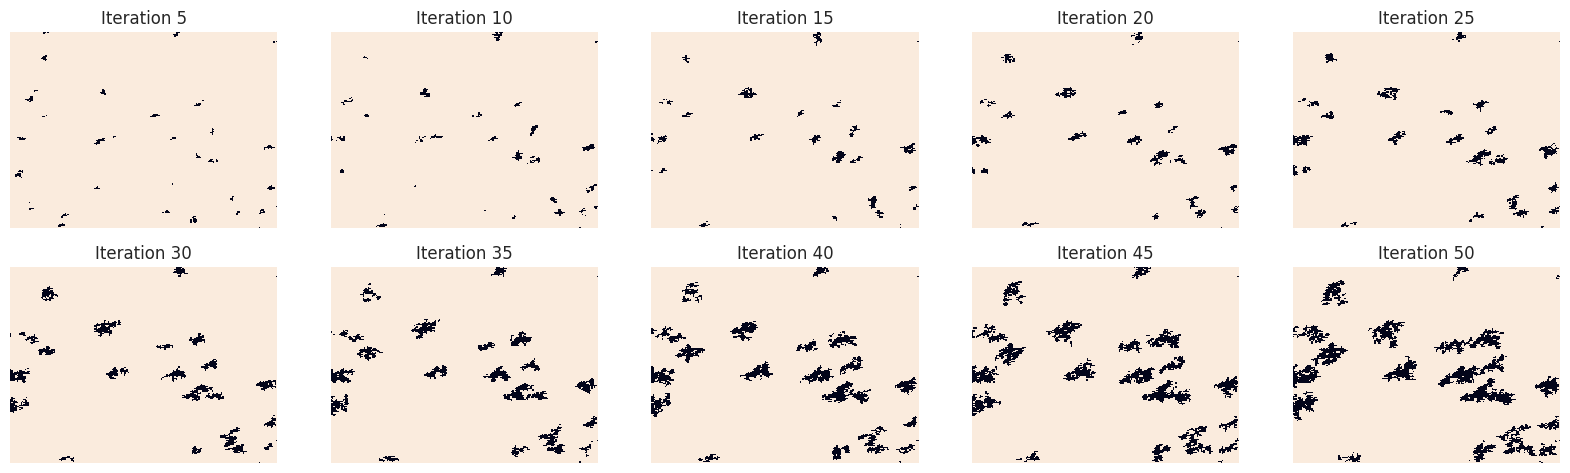

Densidade


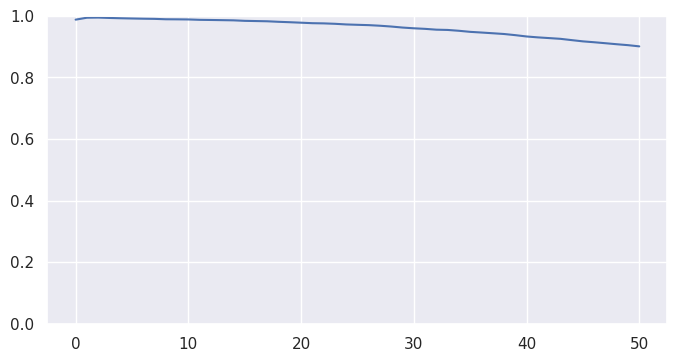




0.48626838685192453


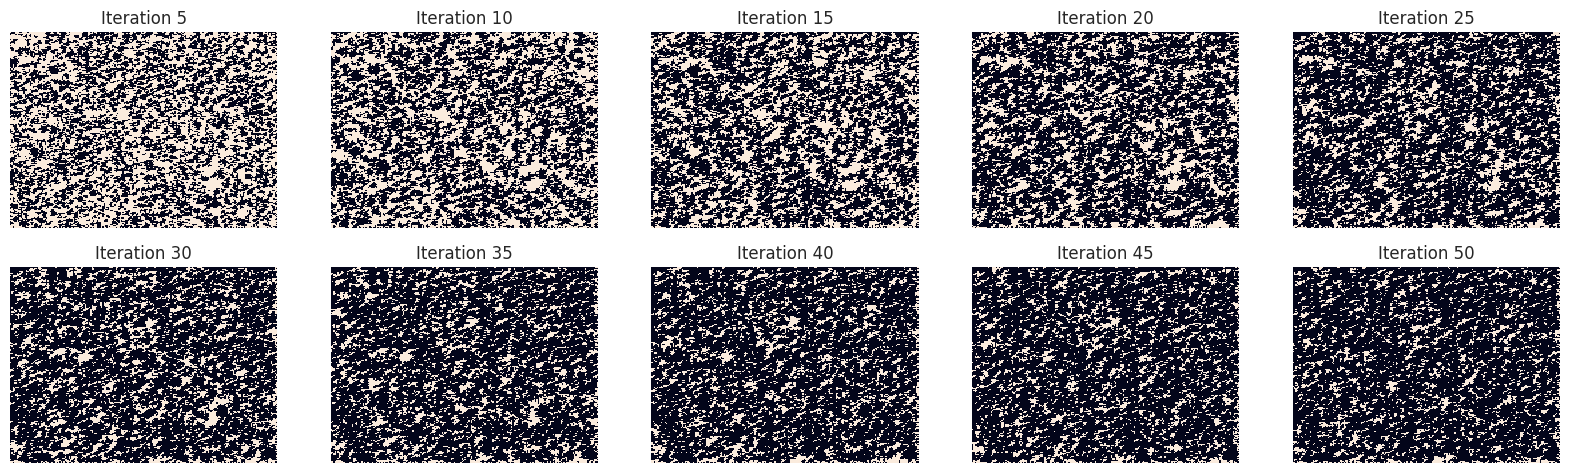

Densidade


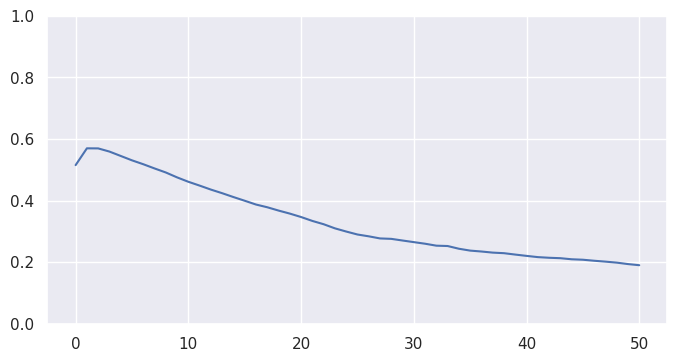




0.6157869109969496


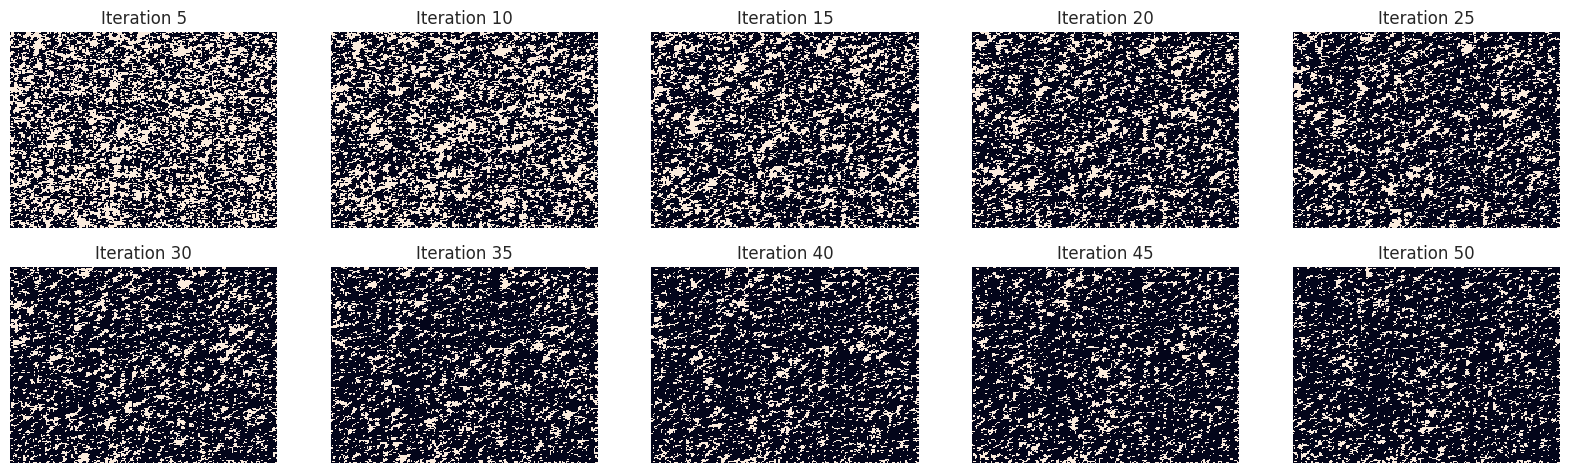

Densidade


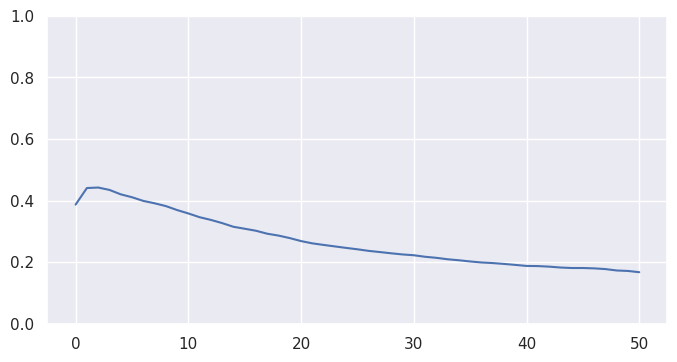

In [45]:
K = 0.25
b = 2
final = 50
for i in range(3):
  evolution(L, K, b, final)
  print("\n\n")

0.018009517655341867


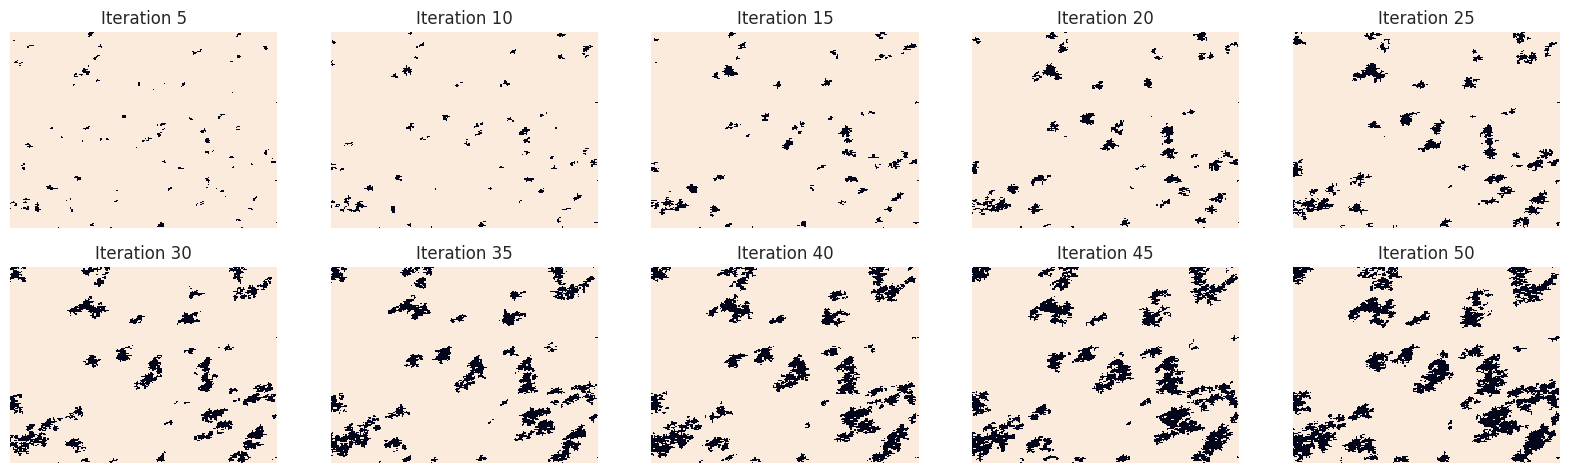

Densidade


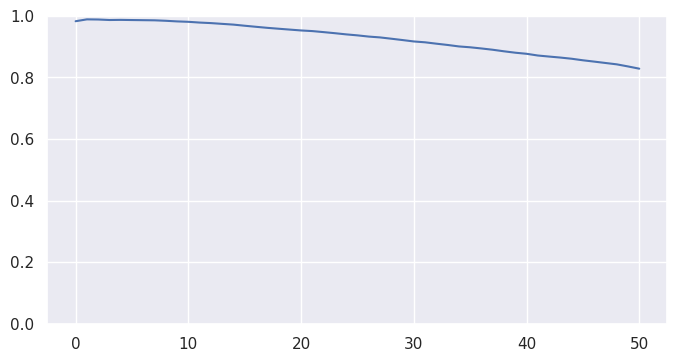




0.04391870576110113


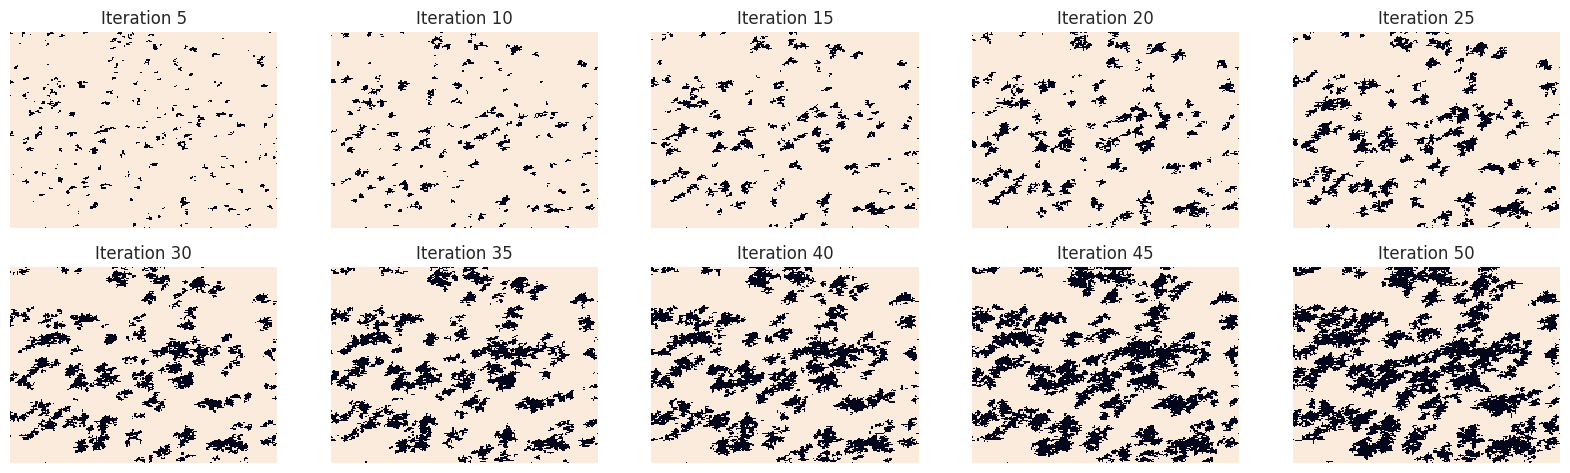

Densidade


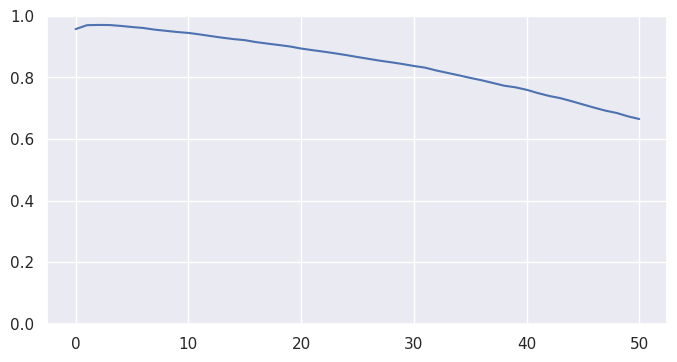




0.7796406091133093


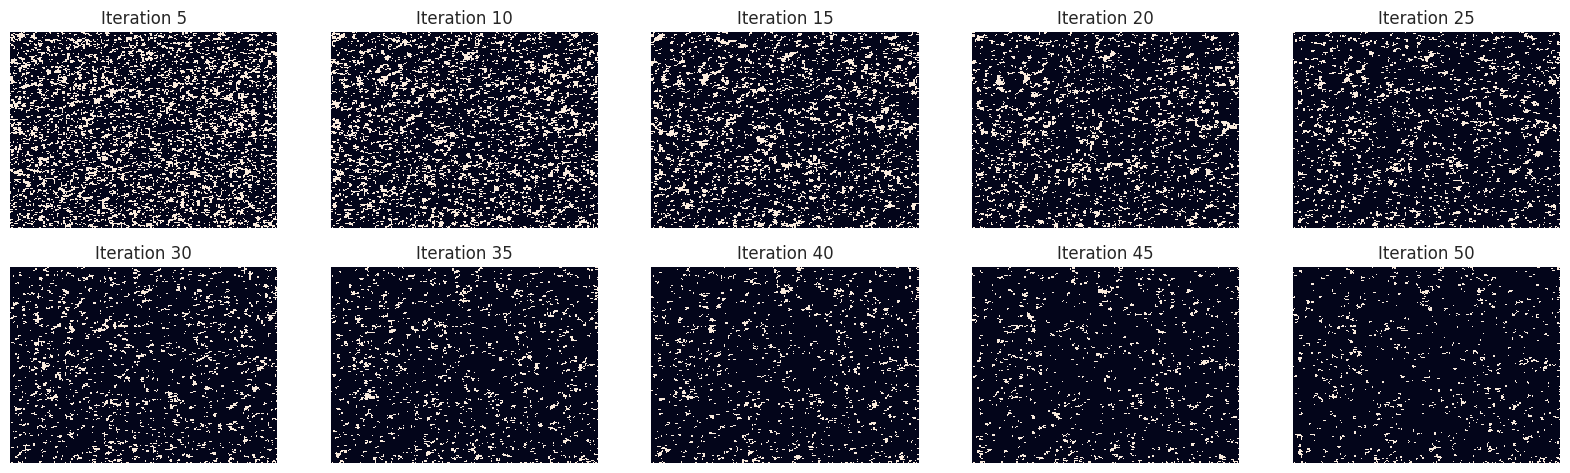

Densidade


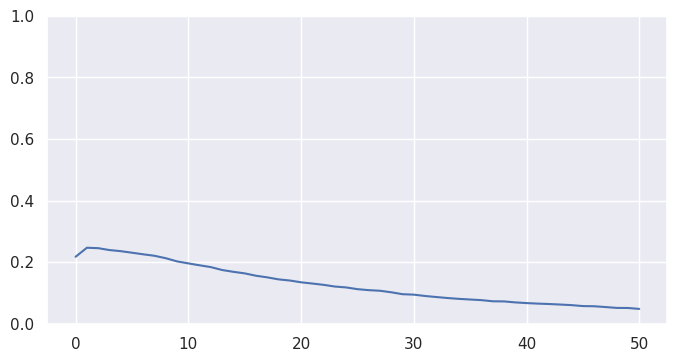

In [46]:
K = 0.5
b = 1
final = 50
for i in range(3):
  evolution(L, K, b, final)
  print("\n\n")

0.12058066214438035


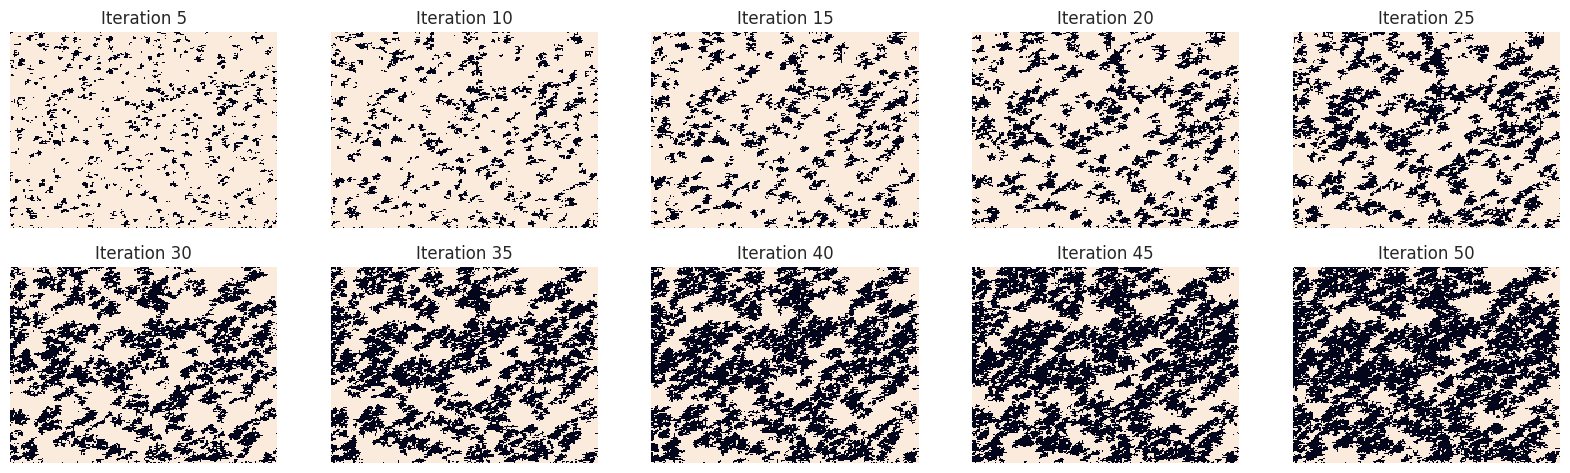

Densidade


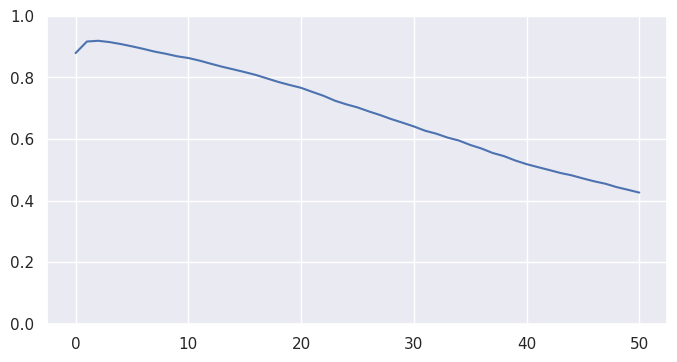




0.9253685763952549


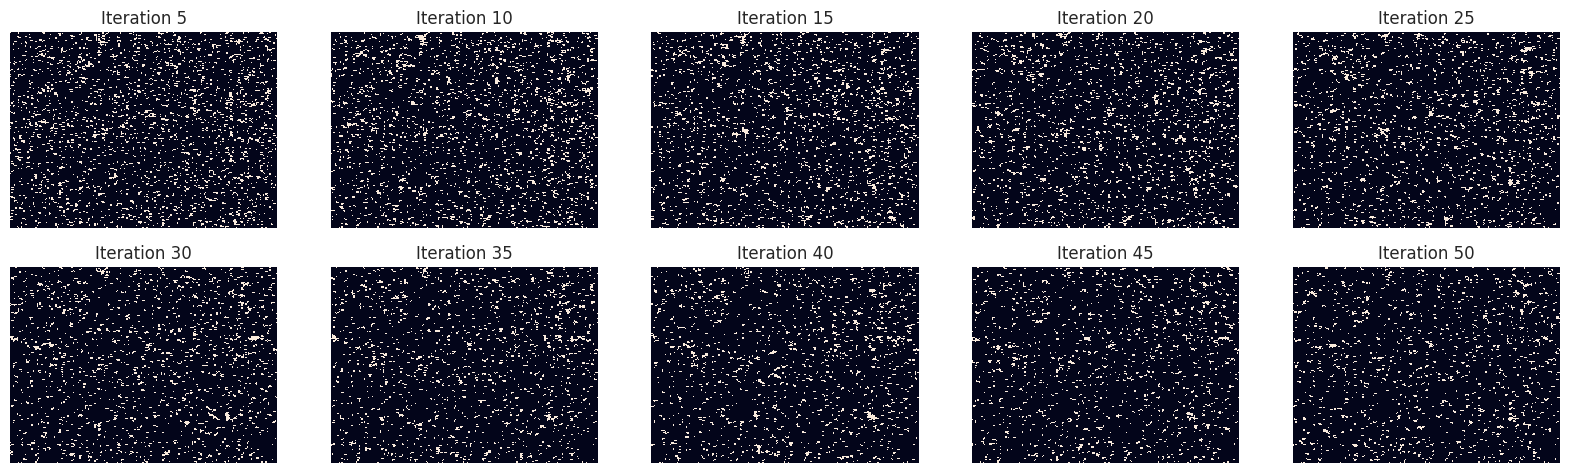

Densidade


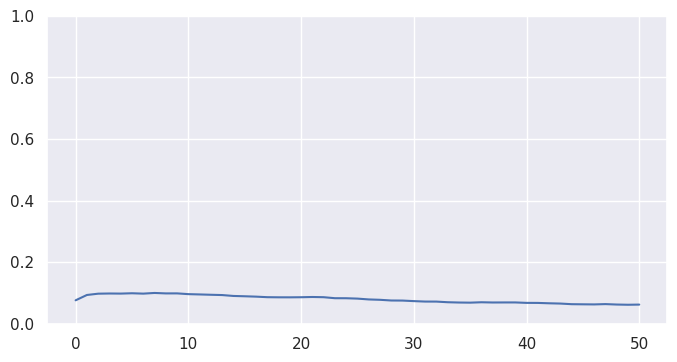




0.973120137704865


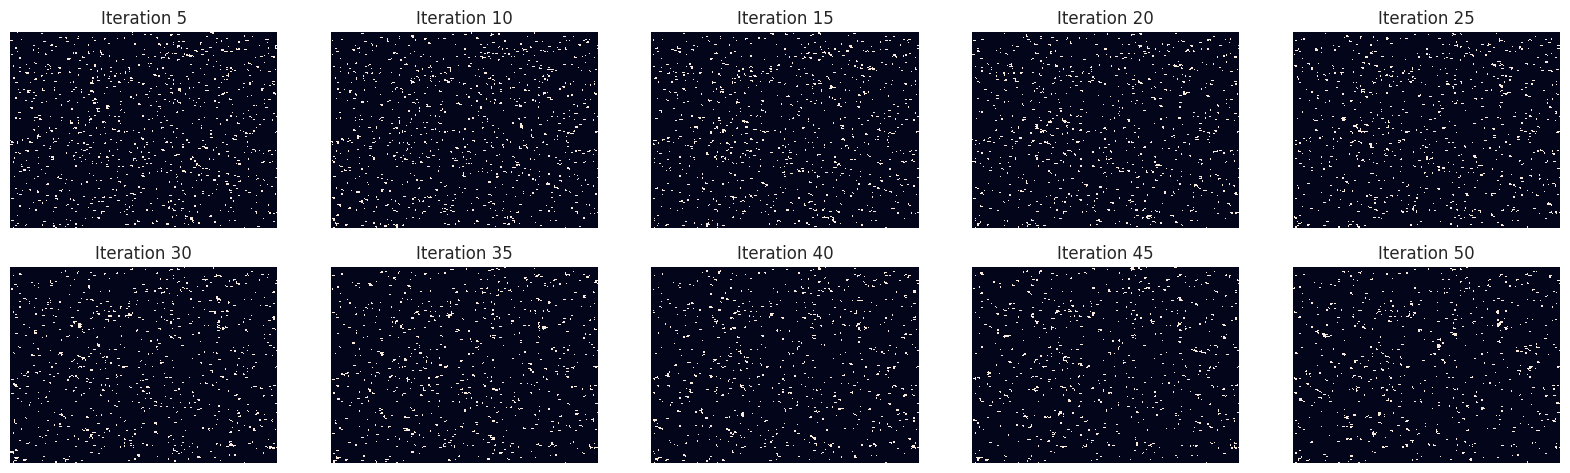

Densidade


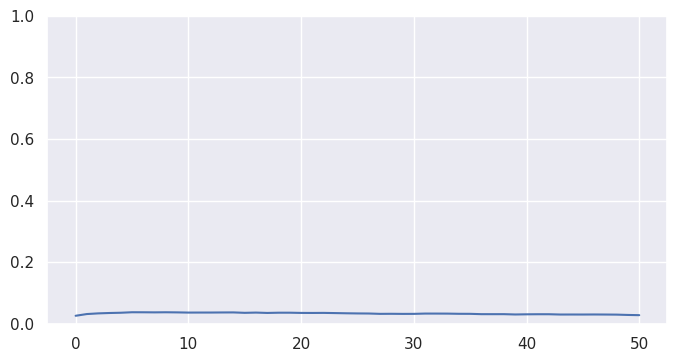

In [47]:
K = 0.5
b = 2
final = 50
for i in range(3):
  evolution(L, K, b, final)
  print("\n\n")